This project will follow the CRISP-DM process outlined for questions through communication. There are six steps.
* Business understanding
* Data understanding
* Data preparation
* Modeling
* Evaluation
* Deployment

**1. Business Understanding**

* What are the top popular category videos in the trending video list. This could help the current YouTubers or future YouTubers find better video creating directions.
* What is the best time period (hours) to post videos. We know that the time for people watching YouTube videos various, then how to grape the good time info to post videos is also very important.
* Understand the correlation among user reactions after watching videos, like view numbers, like numbers, dislike numbers and comment numbers.

**2. Data Understanding**



To achieve the businnes goal, we need to get the YouTube trending vedio data. We need to know the trending video category info, when the videos get published and the users reaction after watching these videos. 

["Trending YouTube Video Statistics"](https://www.kaggle.com/datasnaek/youtube-new#USvideos.csv) provides the related data info. We will use two files, USvideo.csv which has the trending video basic info and it has more than 40k recordes; US_category_id.json has all the category info, we could use the category title which would be easier to understand for readers.

The following cells will show the two files content.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
#from platform import python_version
#print(python_version())
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
us_videos = pd.read_csv('../input/youtube-new/USvideos.csv')
us_videos_categories = pd.read_json('../input/youtube-new/US_category_id.json')

In [2]:
us_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [3]:
us_videos_categories.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [4]:
us_videos_categories['items'][1]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
 'id': '2',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Autos & Vehicles',
  'assignable': True}}

**3. Data Preparation**

* Add category column

The purpose of this is to the top popular catgegories. We don't need to drop the missing category value here, since our goal is to aggregate diffrent categories data by group.

In [5]:
# us_videos dataframe has a column categroy_id, by using this we could join us_videos_categories and add a new 'category' column which has category title 
id_to_title = {}
for item in us_videos_categories['items']:
    id_to_title[item['id']] = item['snippet']['title']    
us_videos.insert(5, 'category', us_videos['category_id'].astype(str).map(id_to_title))
us_videos.head(1)

,video_id,trending_date,title,channel_title,category_id,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,People & Blogs,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...


* Refomat data related column; add publish_hour and publish_date column

We also don't need to handle missing value here

In [6]:
# Transforming Trending date column to datetime format
us_videos['trending_date'] = pd.to_datetime(us_videos['trending_date'], format='%y.%d.%m').dt.date

# Transforming Trending date column to datetime format and splitting into two separate ones
publish_time = pd.to_datetime(us_videos['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
us_videos['publish_date'] = publish_time.dt.date
us_videos['publish_time'] = publish_time.dt.time
us_videos['publish_hour'] = publish_time.dt.hour

us_videos.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,publish_hour
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,People & Blogs,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13,17
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,Entertainment,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-13,7
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017-11-12,19
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,Entertainment,11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,2017-11-13,11
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2017-11-12,18


* Add like/dislike ratio column

If dislikes is 0, the result would be inf. We will not drop the inf data here, since we could igore the data when we plot

In [7]:
us_videos['like_to_dislike'] = us_videos['likes'] / us_videos['dislikes']

* Function define

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

def barGraph(xValues, yValues, title, xlable):
    sns.barplot(xValues, yValues, palette = "rocket")
    plt.title(title)
    plt.xlabel(xlable)
    plt.show()

In [9]:
def scatterGraph(xValues, yValues, xlable, ylabel, title):
    plt.plot(xValues, yValues)
    plt.scatter(xValues, yValues)
    plt.xlabel(xlable)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

**4. Modeling**

* Top popular trending category

In [10]:
category_video_count = us_videos.groupby(["category"]).size().sort_values(ascending = False)
category_video_count

category
Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Shows                      57
Nonprofits & Activism      57
dtype: int64

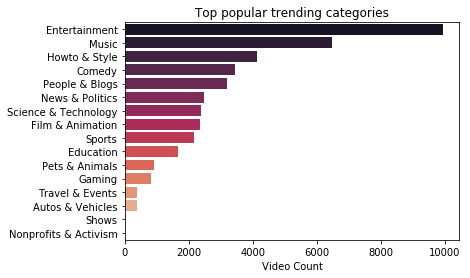

In [11]:
barGraph(category_video_count.values, category_video_count.index.values, "Top popular trending categories", "Video Count")

* Top view categories

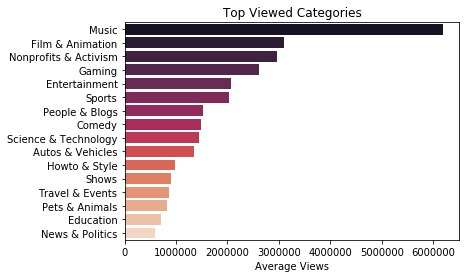

In [12]:
category_views = us_videos.groupby(["category"]).mean().sort_values(by = "views", ascending = False)
barGraph(category_views["views"], category_views.index.values, "Top Viewed Categories", "Average Views")

* Top like ratio categories

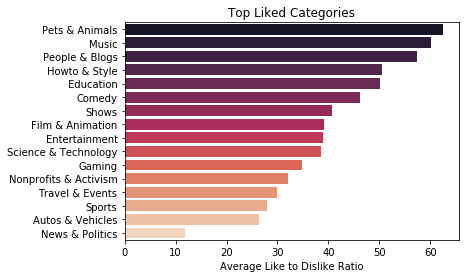

In [13]:
category_like_ratio = us_videos[us_videos["dislikes"] != 0].groupby("category").mean().sort_values(by = "like_to_dislike", ascending = False)
barGraph(category_like_ratio["like_to_dislike"], category_like_ratio.index.values, "Top Liked Categories", "Average Like to Dislike Ratio")

* Trending video published by the hour

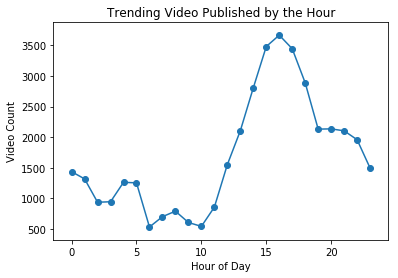

In [14]:
publish_hour_data = us_videos.groupby(["publish_hour"]).size()
scatterGraph(
    publish_hour_data.index.values,
    publish_hour_data.values,
    "Hour of Day",
    "Video Count",
    "Trending Video Published by the Hour")

* Average amount of views on trending videos by the hour

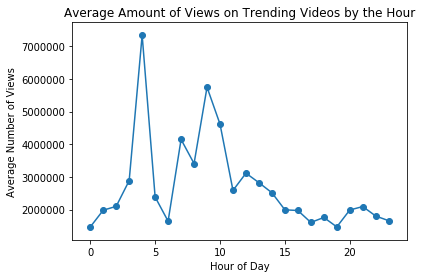

In [15]:
publish_hour_data_average = us_videos.groupby(["publish_hour"]).mean()
scatterGraph(
    publish_hour_data_average.index.values,
    publish_hour_data_average["views"],
    "Hour of Day",
    "Average Number of Views",
    "Average Amount of Views on Trending Videos by the Hour")

* Average amount of likes on trending videos by the hour

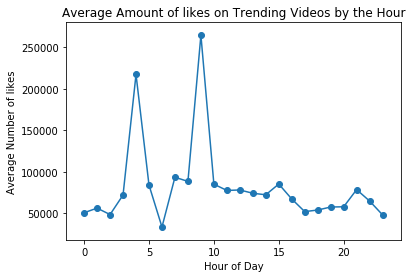

In [16]:
scatterGraph(
    publish_hour_data_average.index.values,
    publish_hour_data_average["likes"],
    "Hour of Day",
    "Average Number of likes",
    "Average Amount of likes on Trending Videos by the Hour")

* **The correaltion between views, likes, dislikes and comment_count**

In [17]:
correlation_list = ['views', 'likes', 'dislikes', 'comment_count', 'like_to_dislike']
correlation = us_videos[correlation_list].corr()
display(correlation)

,views,likes,dislikes,comment_count,like_to_dislike
views,1.000000,0.849177,0.472213,0.617621,-0.041138
likes,0.849177,1.000000,0.447186,0.803057,0.075387
dislikes,0.472213,0.447186,1.000000,0.700184,-0.059890
comment_count,0.617621,0.803057,0.700184,1.000000,0.018280
like_to_dislike,-0.041138,0.075387,-0.059890,0.018280,1.000000


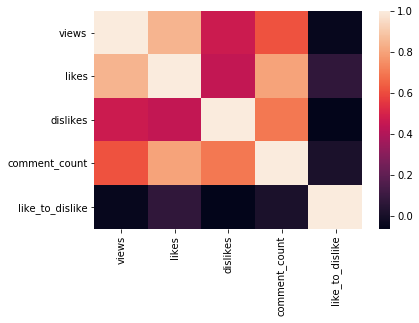

In [18]:
sns.heatmap(correlation)

**5. Evaluation**

* Entertainment and some related categories are very popular in YouTube. If you want to get more views, music and films are good options.
* Post video in the afternoon has a high probability to become a trending video. But if you want to get more views, post it at morning.
* User reaction is based on the video views. So increasing the video views would be very important. High views doesn’t mean high quality, you need to use other ways to improve the video quality.

**6. Deployment**